In [2]:
#Importing the requird libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ds = pd.read_csv("Position_Salaries.csv")
ds

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = ds.iloc[:,1:-1].values
y = ds.iloc[:,-1].values

In [ ]:
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
#transfroming 1d array to 2d array
y = y.reshape(len(y),1)
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
#normalize the range of independent variables 
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## traning the SVR   model on the whole dataset

In [ ]:
from sklearn.svm  import SVR
reg = SVR(kernel= 'rbf')  #Radial-basis function kernel
# Radial Basis Kernel is a kernel function that is used in 
# machine learning to find a non-linear classifier or regression line.
reg.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## predicting the nw result

In [ ]:
sc_y.inverse_transform(reg.predict(sc_X.transform([[6.5]])).reshape(1,1))

array([[170370.0204065]])

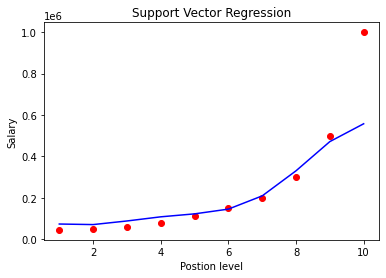

In [ ]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y) , color ="red")
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(reg.predict(X).reshape(len(X),1)),color = "blue")
plt.title('Support Vector Regression')
plt.xlabel("Postion level")
plt.ylabel("Salary")
plt.show()


## Visualising the SVR results (for higher resolution and smoother curve)

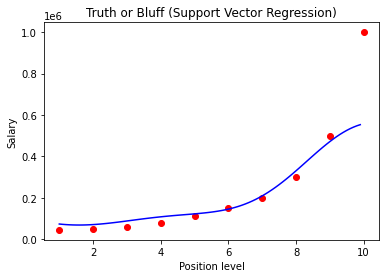

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(reg.predict(sc_X.transform(X_grid)).reshape(len(X_grid),1)), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()